In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
# tf.debugging.set_log_device_placement(True)

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import TensorBoard
from matplotlib import pyplot as plt
import numpy as np

In [4]:
sess = tf.compat.v1.Session()

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

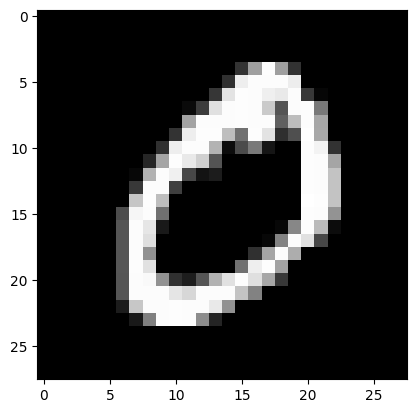

In [6]:
plt.imshow(x_train[1], cmap="gray")
plt.show()

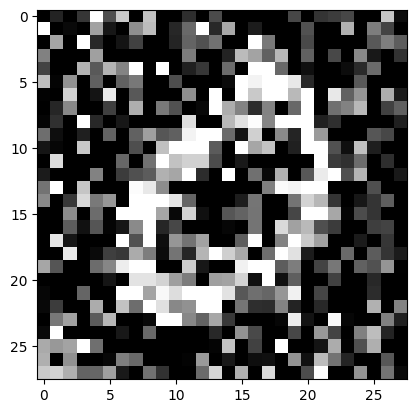

In [7]:
plt.imshow(x_train_noisy[1], cmap="gray")
plt.show()

In [8]:
img = Input(shape=(28, 28, 1))

In [9]:
x = Conv2D(16, (3, 3), activation='relu', padding='same')(img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoder = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoder)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoder = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [10]:
model = Model(inputs=img, outputs=decoder)
model.compile("nadam", loss="binary_crossentropy")

In [11]:
model.fit(x_train_noisy, x_train, epochs=50, batch_size=32, shuffle=True, validation_data=(x_test_noisy, x_test), callbacks=[TensorBoard(log_dir='../logs/denoise_autoencoder_logs')])

Epoch 1/50
1875/1875 [==============================] - 44s 21ms/step - loss: 0.1923 - val_loss: 0.1560
Epoch 2/50
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1460 - val_loss: 0.1388
Epoch 3/50
1875/1875 [==============================] - 40s 22ms/step - loss: 0.1359 - val_loss: 0.1308
Epoch 4/50
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1311 - val_loss: 0.1278
Epoch 5/50
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1284 - val_loss: 0.1257
Epoch 6/50
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1264 - val_loss: 0.1243
Epoch 7/50
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1249 - val_loss: 0.1240
Epoch 8/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1238 - val_loss: 0.1230
Epoch 9/50
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1229 - val_loss: 0.1213
Epoch 10/50
1875/1875 [==============================] - 41s 22m

In [ ]:
encoder.save('../models/denoise_autoencoders/encoder_model')
model.save('../models/denoise_autoencoders/denoise_model')

1/1 [==============================] - 0s 32ms/step


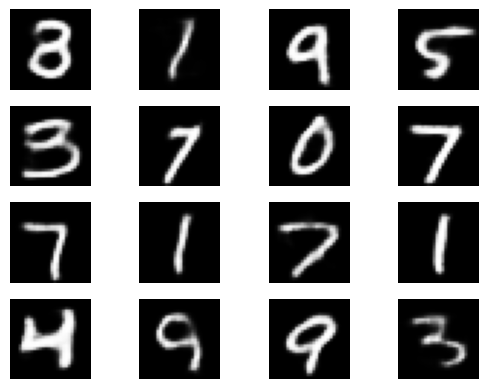

In [12]:
fig, axs = plt.subplots(4, 4)
rand = x_test[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))

for i in range(4):
    for j in range(4):
        axs[i, j].imshow(model.predict(rand[i, j])[0], cmap="gray")
        axs[i, j].axis("off")